In [21]:
import pandas as pd

# Caminho correto relativo ao notebook
csv_path = "data/generatedBy_react-csv.csv"

# Leitura do INMET com separador ; , vírgula decimal e encoding latin1
df = pd.read_csv(csv_path, sep=";", decimal=",", encoding="latin1")

df.head()


,"ï»¿""Data""",Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
0,01/09/2025,0,17.7,18.1,17.7,97.0,98.0,97.0,17.3,17.7,17.3,924.9,924.9,924.5,2.4,107.0,7.3,NaN,0.0
1,01/09/2025,100,17.7,17.8,17.5,98.0,98.0,97.0,17.3,17.4,17.2,925.1,925.1,924.8,2.4,129.0,6.2,0.2,0.0
2,01/09/2025,200,17.7,17.8,17.6,97.0,98.0,97.0,17.3,17.4,17.2,924.8,925.1,924.8,2.1,90.0,7.4,0.1,0.0
3,01/09/2025,300,17.6,17.7,17.5,98.0,98.0,97.0,17.2,17.3,17.1,924.2,924.8,924.2,2.6,108.0,7.9,NaN,0.0
4,01/09/2025,400,17.4,17.6,17.4,98.0,98.0,98.0,17.0,17.2,17.0,923.7,924.2,923.7,1.8,84.0,8.7,0.2,0.0


In [22]:
# Renomear coluna que veio com BOM UTF-8
df.rename(columns={'ï»¿"Data"': 'Data',
                   'Radiacao (KJ/mÂ²)': 'Radiacao (KJ/m2)'}, inplace=True)

# Ajustar a hora para formato 4 dígitos (0000, 0100, 0200...)
df['Hora (UTC)'] = df['Hora (UTC)'].astype(str).str.zfill(4)

# Criar coluna datetime
df['datetime'] = pd.to_datetime(df['Data'] + ' ' + df['Hora (UTC)'],
                                format='%d/%m/%Y %H%M')

# Definir índice
df = df.set_index('datetime')

# Remover colunas antigas
df.drop(columns=['Data', 'Hora (UTC)'], inplace=True)

df.head()


,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m2),Chuva (mm)
datetime,,,,,,,,,,,,,,,,,
2025-09-01 00:00:00,17.7,18.1,17.7,97.0,98.0,97.0,17.3,17.7,17.3,924.9,924.9,924.5,2.4,107.0,7.3,NaN,0.0
2025-09-01 01:00:00,17.7,17.8,17.5,98.0,98.0,97.0,17.3,17.4,17.2,925.1,925.1,924.8,2.4,129.0,6.2,0.2,0.0
2025-09-01 02:00:00,17.7,17.8,17.6,97.0,98.0,97.0,17.3,17.4,17.2,924.8,925.1,924.8,2.1,90.0,7.4,0.1,0.0
2025-09-01 03:00:00,17.6,17.7,17.5,98.0,98.0,97.0,17.2,17.3,17.1,924.2,924.8,924.2,2.6,108.0,7.9,NaN,0.0
2025-09-01 04:00:00,17.4,17.6,17.4,98.0,98.0,98.0,17.0,17.2,17.0,923.7,924.2,923.7,1.8,84.0,8.7,0.2,0.0


In [23]:
df.isna().sum()


Temp. Ins. (C)            2
Temp. Max. (C)            2
Temp. Min. (C)            2
Umi. Ins. (%)             2
Umi. Max. (%)             2
Umi. Min. (%)             2
Pto Orvalho Ins. (C)      2
Pto Orvalho Max. (C)      2
Pto Orvalho Min. (C)      2
Pressao Ins. (hPa)        2
Pressao Max. (hPa)        2
Pressao Min. (hPa)        2
Vel. Vento (m/s)          2
Dir. Vento (m/s)          2
Raj. Vento (m/s)          2
Radiacao (KJ/m2)        854
Chuva (mm)                2
dtype: int64

In [24]:
df = df.replace(-9999, pd.NA)
df = df.replace(-9999.0, pd.NA)
df = df.replace(9999, pd.NA)
df = df.replace(9999.0, pd.NA)


In [25]:
df = df.resample('H').asfreq()


C:\Users\Manu\AppData\Local\Temp\ipykernel_22388\892005370.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').asfreq()


In [26]:
cols_to_interp = [
    'Temp. Ins. (C)',
    'Umi. Ins. (%)',
    'Vel. Vento (m/s)',
    'Radiacao (KJ/m2)'
]

df[cols_to_interp] = df[cols_to_interp].interpolate(method='time')


In [27]:
df['Radiacao (KJ/m2)'] = df['Radiacao (KJ/m2)'].fillna(0)


In [28]:
df_model = df[['Temp. Ins. (C)',
               'Umi. Ins. (%)',
               'Vel. Vento (m/s)',
               'Radiacao (KJ/m2)',
               'Chuva (mm)']].copy()


<Axes: title={'center': 'Temperatura ao longo do tempo'}, xlabel='datetime'>

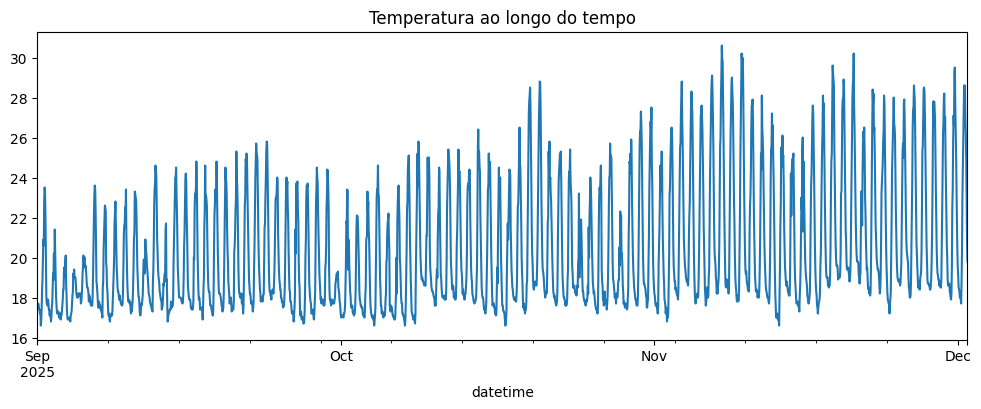

In [29]:
df_model['Temp. Ins. (C)'].plot(figsize=(12,4), title="Temperatura ao longo do tempo")


In [30]:
df_model.head()


,Temp. Ins. (C),Umi. Ins. (%),Vel. Vento (m/s),Radiacao (KJ/m2),Chuva (mm)
datetime,,,,,
2025-09-01 00:00:00,17.7,97.0,2.4,0.00,0.0
2025-09-01 01:00:00,17.7,98.0,2.4,0.20,0.0
2025-09-01 02:00:00,17.7,97.0,2.1,0.10,0.0
2025-09-01 03:00:00,17.6,98.0,2.6,0.15,0.0
2025-09-01 04:00:00,17.4,98.0,1.8,0.20,0.0


<Axes: title={'center': 'Temperatura após limpeza e interpolação'}, xlabel='datetime'>

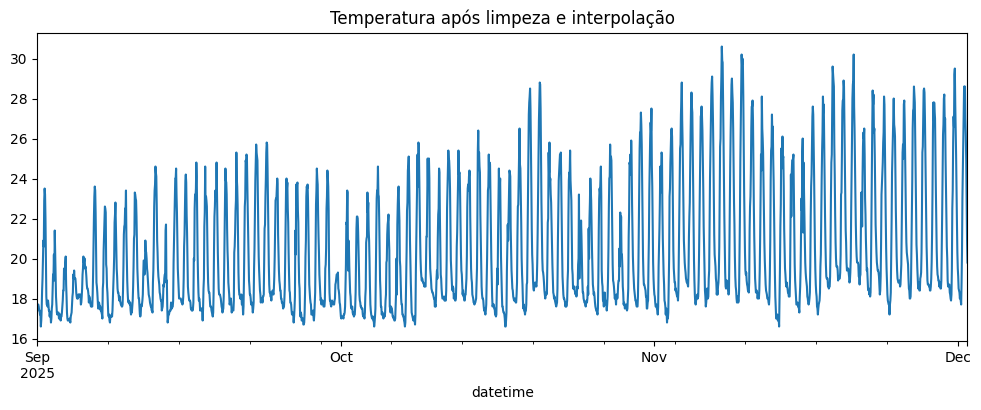

In [31]:
df_model['Temp. Ins. (C)'].plot(figsize=(12,4), title="Temperatura após limpeza e interpolação")


In [32]:
df_features = df_model.copy()

# Criar lags de temperatura, umidade, vento e radiação
lags = [1, 2, 3, 6, 12, 24]

for lag in lags:
    df_features[f'Temp_lag_{lag}'] = df_features['Temp. Ins. (C)'].shift(lag)
    df_features[f'Umi_lag_{lag}'] = df_features['Umi. Ins. (%)'].shift(lag)
    df_features[f'Vento_lag_{lag}'] = df_features['Vel. Vento (m/s)'].shift(lag)
    df_features[f'Rad_lag_{lag}'] = df_features['Radiacao (KJ/m2)'].shift(lag)

# Criar features cíclicas
df_features['hour'] = df_features.index.hour
import numpy as np
df_features['hour_sin'] = np.sin(2 * np.pi * df_features['hour'] / 24)
df_features['hour_cos'] = np.cos(2 * np.pi * df_features['hour'] / 24)

# Criar variável target (temperatura 1 hora à frente)
df_features['Temp_future_1h'] = df_features['Temp. Ins. (C)'].shift(-1)

# Remover linhas com NaN (início dos lags e final do target)
df_features = df_features.dropna()

df_features.head()


,Temp. Ins. (C),Umi. Ins. (%),Vel. Vento (m/s),Radiacao (KJ/m2),Chuva (mm),Temp_lag_1,Umi_lag_1,Vento_lag_1,Rad_lag_1,Temp_lag_2,...,Vento_lag_12,Rad_lag_12,Temp_lag_24,Umi_lag_24,Vento_lag_24,Rad_lag_24,hour,hour_sin,hour_cos,Temp_future_1h
datetime,,,,,,,,,,,,,,,,,,,,,
2025-09-02 00:00:00,17.6,98.0,2.2,2.1,0.0,17.7,97.0,1.8,3.6,17.7,...,2.7,785.8,17.7,97.0,2.4,0.00,0,0.000000,1.000000,17.9
2025-09-02 01:00:00,17.9,98.0,3.8,0.6,0.6,17.6,98.0,2.2,2.1,17.7,...,1.7,1210.3,17.7,98.0,2.4,0.20,1,0.258819,0.965926,17.7
2025-09-02 02:00:00,17.7,98.0,2.9,0.1,2.2,17.9,98.0,3.8,0.6,17.6,...,2.1,1000.7,17.7,97.0,2.1,0.10,2,0.500000,0.866025,17.4
2025-09-02 03:00:00,17.4,98.0,2.5,0.7,0.2,17.7,98.0,2.9,0.1,17.9,...,2.8,1928.0,17.6,98.0,2.6,0.15,3,0.707107,0.707107,17.4
2025-09-02 04:00:00,17.4,98.0,2.4,0.7,0.2,17.4,98.0,2.5,0.7,17.7,...,1.9,1907.4,17.4,98.0,1.8,0.20,4,0.866025,0.500000,17.1
